# Logistic Regression
https://www.kaggle.com/competitions/spaceship-titanic/overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc
from collections import Counter
import numpy as np
from math import exp

/Users/sharad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
def train_test_split(df, frac=0.2):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)

    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

In [3]:
titanic = pd.read_csv('/Users/sharad/Courses/DATA_5600/Data/spaceship_titanic/train.csv')
titanic = titanic[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck','Transported']]
titanic.dropna(inplace=True)
print(titanic.shape)
titanic_train, titanic_test = train_test_split(titanic, frac=0.2)

print(titanic_train.shape)
print(titanic_test.shape)

(6923, 11)
(5538, 11)
(1385, 11)


In [4]:
titanic_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True


In [5]:
titanic_train['Transported'] = np.where(titanic_train['Transported'], 1, 0)
titanic_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,1


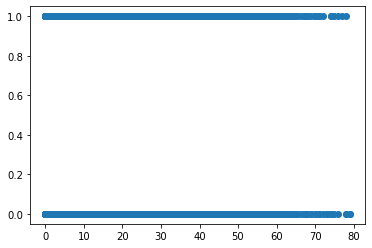

In [6]:
plt.scatter(titanic_train['Age'],titanic_train['Transported'])

/Users/sharad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transported', ylabel='Age'>

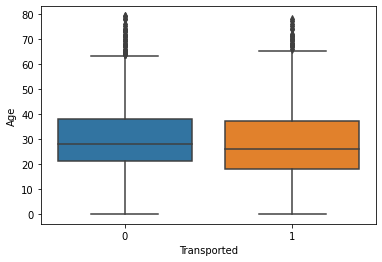

In [7]:
sns.boxplot(titanic_train['Transported'],titanic_train['Age'])

## Classification via Linear Regression

In [8]:
Xtrain = titanic_train[['Age']]
ytrain = titanic_train[['Transported']]
Xtrain = sm.add_constant(Xtrain)
#lm = smf.ols("Transported ~ Age")
lm = sm.OLS(ytrain, Xtrain).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transported   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     39.55
Date:                Sun, 22 May 2022   Prob (F-statistic):           3.45e-10
Time:                        09:28:08   Log-Likelihood:                -3999.7
No. Observations:                5538   AIC:                             8003.
Df Residuals:                    5536   BIC:                             8017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5836      0.015     39.130      0.000       0.554       0.613
Age           -0.0029      0.000     -6.289      0.000      -0.004      -0.002
==============================================================================
Omnibus:                    19523.262   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              897.155
Skew:                           0.003   Prob(JB):                    1.53e-195
Kurtosis:                       1.028   Cond. No.                         71.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


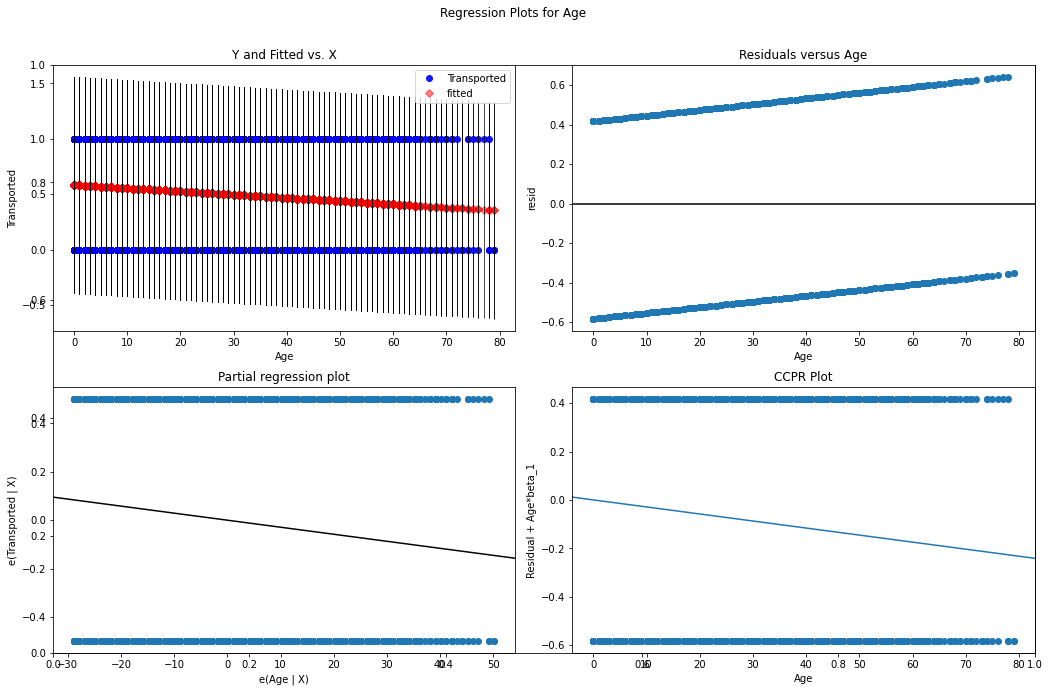

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(lm,'Age', fig=fig)
plt.show()

In [16]:
Xtrain = titanic_train[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']]
ytrain = titanic_train[['Transported']]

In [17]:
Xtrain.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0


In [19]:
Xtrain = pd.get_dummies(data=Xtrain, drop_first=True)
Xtrain.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,1,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,1,0
5,44.0,0.0,483.0,0.0,291.0,0.0,0,0,0,1,0,0


In [21]:
Xtrain = sm.add_constant(Xtrain)
lm = sm.OLS(ytrain, Xtrain).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transported   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     242.7
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        09:35:01   Log-Likelihood:                -2847.0
No. Observations:                5538   AIC:                             5720.
Df Residuals:                    5525   BIC:                             5806.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4604      0.018     25.652      0.000       0.425       0.496
Age                          -0.0026      0.000     -6.564      0.000      -0.003      -0.002
RoomService                  -0.0001   8.34e-06    -13.117      0.000      -0.000   -9.31e-05
FoodCourt                  4.435e-05   3.57e-06     12.413      0.000    3.73e-05    5.14e-05
ShoppingMall               7.495e-05    8.7e-06      8.611      0.000    5.79e-05     9.2e-05
Spa                       -8.654e-05   5.07e-06    -17.071      0.000   -9.65e-05   -7.66e-05
VRDeck                    -8.328e-05   5.06e-06    -16.446      0.000   -9.32e-05   -7.34e-05
HomePlanet_Europa             0.2636      0.016     16.196      0.000       0.232       0.296
HomePlanet_Mars               0.1117      0.015      7.349      0.000       0.082       0.141
CryoSleep_True                0.3648      0.013     27.154      0.000       0.338       0.391
Destination_PSO J318.5-22    -0.0661      0.022     -2.979      0.003      -0.110      -0.023
Destination_TRAPPIST-1e      -0.0787      0.014     -5.610      0.000      -0.106      -0.051
VIP_True                     -0.0789      0.037     -2.120      0.034      -0.152      -0.006
==============================================================================
Omnibus:                      424.950   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.773
Skew:                           0.128   Prob(JB):                     6.70e-34
Kurtosis:                       2.228   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


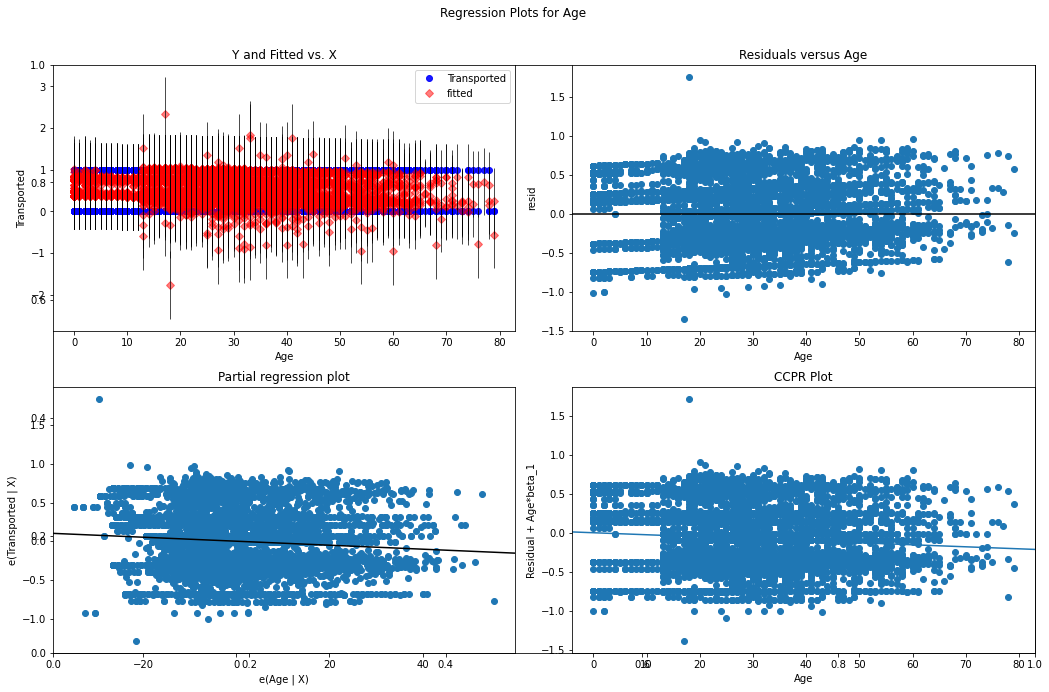

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(lm,'Age', fig=fig)
plt.show()

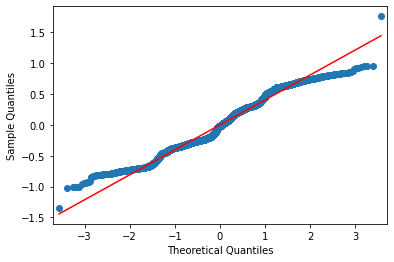

In [23]:
fig = sm.qqplot(lm.resid, line="s")

In [24]:
titanic_test['Transported'] = np.where(titanic_test['Transported'], 1, 0)

Xtest = titanic_test[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']]
ytest = titanic_test[['Transported']]
Xtest = pd.get_dummies(data=Xtest, drop_first=True)
Xtest = sm.add_constant(Xtest)

Xtest.head()

,const,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
4383,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
7523,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
4413,1.0,38.0,0.0,172.0,615.0,0.0,0.0,0,0,0,0,1,0
3043,1.0,52.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0
4042,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,1,0


In [26]:
preds

4383    0.736249
7523    0.993568
4413    0.337574
3043    0.876234
4042    0.793860
          ...   
7712    0.395943
4483    0.712758
3873    0.799011
2737    0.374767
1346    0.927744
Length: 1385, dtype: float64

In [25]:
preds = lm.predict(Xtest)
preds.describe()

count    1385.000000
mean        0.499522
std         0.285744
min        -0.828920
25%         0.278580
50%         0.410317
75%         0.735109
max         1.470490
dtype: float64

In [27]:
mse = np.mean(np.square(np.subtract(ytest.to_numpy()[:,0], preds)))
mse

0.15638180479363356

## Logistic Regression

In [28]:
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.440108
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Transported   No. Observations:                 5538
Model:                          Logit   Df Residuals:                     5525
Method:                           MLE   Df Model:                           12
Date:                Sun, 22 May 2022   Pseudo R-squ.:                  0.3651
Time:                        09:40:53   Log-Likelihood:                -2437.3
converged:                       True   LL-Null:                       -3838.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4683      0.116      4.037      0.000       0.241       0.696
Age                          -0.0100      0.002     -4.033      0.000      -0.015      -0.005
RoomService                  -0.0014      0.000    -12.860      0.000      -0.002      -0.001
FoodCourt                     0.0005   4.75e-05     11.557      0.000       0.000       0.001
ShoppingMall                  0.0006   8.12e-05      7.250      0.000       0.000       0.001
Spa                          -0.0021      0.000    -15.596      0.000      -0.002      -0.002
VRDeck                       -0.0019      0.000    -14.991      0.000      -0.002      -0.002
HomePlanet_Europa             2.2454      0.147     15.229      0.000       1.956       2.534
HomePlanet_Mars               0.6947      0.095      7.302      0.000       0.508       0.881
CryoSleep_True                1.1632      0.090     12.934      0.000       0.987       1.339
Destination_PSO J318.5-22    -0.5677      0.137     -4.156      0.000      -0.835      -0.300
Destination_TRAPPIST-1e      -0.6664      0.098     -6.772      0.000      -0.859      -0.474
VIP_True                     -0.5930      0.304     -1.953      0.051      -1.188       0.002
=============================================================================================
"""

## Evaluation Metrics

In [29]:
threshold = 0.5

preds = log_reg.predict(Xtest)
binary_preds = np.where(preds >= threshold, 1,0)
binary_preds

array([1, 1, 0, ..., 1, 1, 1])

In [33]:
binary_preds.shape

(1385,)

### Confusion Matrix
<div>
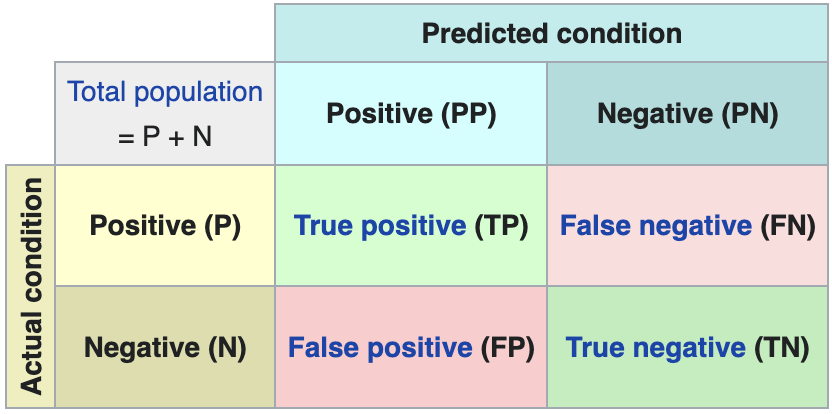
</div>

In [34]:
confusion_matrix(ytest, binary_preds)

array([[547, 123],
       [153, 562]])

### Accuracy

In [35]:
accuracy_score(ytest, binary_preds)

0.8007220216606499

### Majority Class Classifier

In [36]:
label_cnt_dict = Counter(ytest['Transported'])

key_for_highest_value = max(label_cnt_dict, key=label_cnt_dict.get)
print(label_cnt_dict)
print(key_for_highest_value)

Counter({1: 715, 0: 670})
1


In [39]:
label_cnt_dict[0] + label_cnt_dict[1]

1385

In [37]:
maj_class_acc = label_cnt_dict[key_for_highest_value]/(label_cnt_dict[0] + label_cnt_dict[1])
print(maj_class_acc)

0.516245487364621


### Precision and Recall

Precision = $\frac{T_p}{T_p + F_p}$

Recall = $\frac{T_p}{T_p + F_n}$

<div>
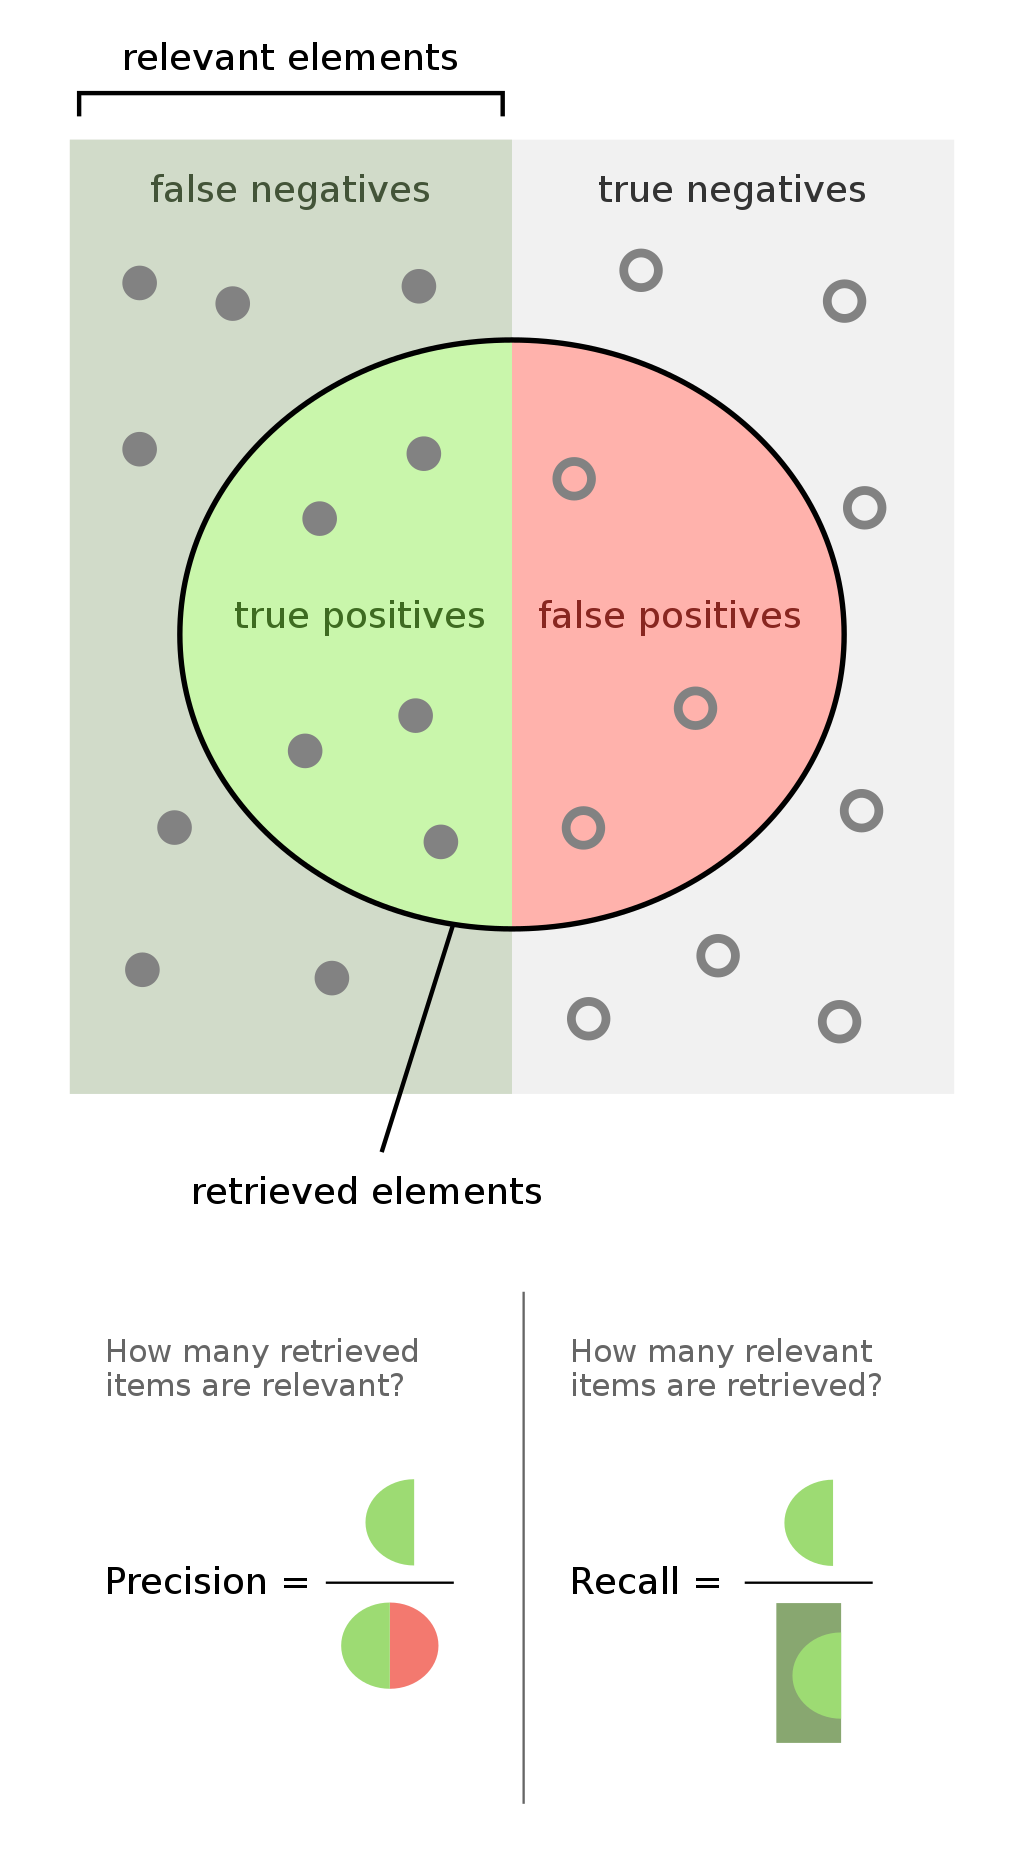
</div>

In [40]:
precision, recall, thresholds = precision_recall_curve(ytest, preds)
print(precision)
print(recall)
print(thresholds)

[0.54372624 0.543379   0.54379284 ... 1.         1.         1.        ]
[1.        0.9986014 0.9986014 ... 0.0027972 0.0013986 0.       ]
[0.00617388 0.00653007 0.00674648 ... 0.99969697 0.99978976 0.99999545]


Text(0, 0.5, 'Precision')

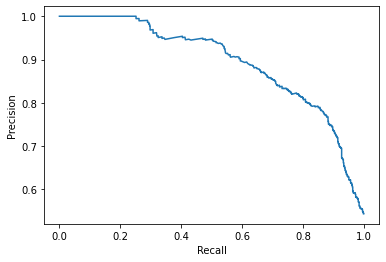

In [41]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

### Receiver Operating Characteristic (ROC) Curve

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

TPR = $\frac{T_p}{T_p + F_n}$

TPR can be thought of as saying "the number of correctly predicted positive cases among all positive cases, both those that were predicted correctly and those that were predicted incorrectly".

FPR = $\frac{F_p}{T_n + F_p}$

FPR can be thought of as saying "the number of **in**correctly predicted negative cases among all negative cases, both those that were predicted correctly and those that were predicted incorrectly".

Text(0, 0.5, 'True Positive Rate')

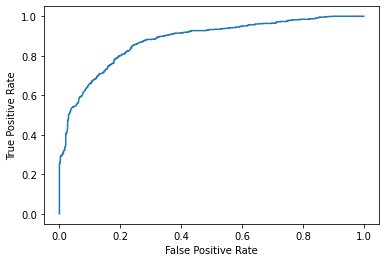

In [42]:
fpr, tpr, thresholds = roc_curve(ytest, preds, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [43]:
auc(fpr, tpr)

0.8783822148001251

### Decision Boundary
#### Quantitative Variables

In [44]:
Xtrain = titanic_train[['Age']]
ytrain = titanic_train[['Transported']]

Xtrain = sm.add_constant(Xtrain)

In [45]:
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.689588
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Transported   No. Observations:                 5538
Model:                          Logit   Df Residuals:                     5536
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 May 2022   Pseudo R-squ.:                0.005135
Time:                        10:03:20   Log-Likelihood:                -3818.9
converged:                       True   LL-Null:                       -3838.6
Covariance Type:            nonrobust   LLR p-value:                 3.409e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3368      0.060      5.580      0.000       0.219       0.455
Age           -0.0117      0.002     -6.244      0.000      -0.015      -0.008
==============================================================================
"""

In [46]:
Xtrain['Age'].describe()

count    5538.000000
mean       28.840376
std        14.491557
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [47]:
x_gen = np.linspace(-1000,2000,100)
x_gen = sm.add_constant(x_gen)

In [48]:
preds = log_reg.predict(x_gen)

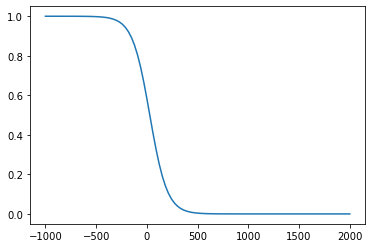

In [49]:
plt.plot(x_gen[:,1],preds)

(0.0, 80.0)

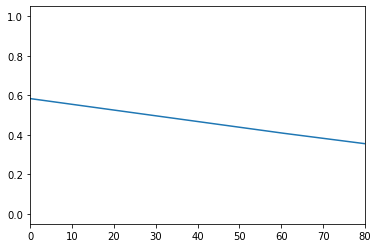

In [50]:
plt.plot(x_gen[:,1],preds)
plt.xlim(0,80)

In [52]:
b_0 = log_reg.params.values[0]
b_1 = log_reg.params.values[1]

In [53]:
x = 10
prob_transport = exp(b_0 + b_1*(x))/(1 + exp(b_0 + b_1*(x)))
prob_transport

0.5547145006625431

In [54]:
x = 70
prob_transport = exp(b_0 + b_1*(x))/(1 + exp(b_0 + b_1*(x)))
prob_transport

0.3815735611126259

#### Qualitative Variable

In [55]:
Xtrain = titanic_train[['VIP']]
Xtrain = pd.get_dummies(data=Xtrain, drop_first=True)
ytrain = titanic_train[['Transported']]

Xtrain = sm.add_constant(Xtrain)

In [56]:
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.692493
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Transported   No. Observations:                 5538
Model:                          Logit   Df Residuals:                     5536
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 May 2022   Pseudo R-squ.:               0.0009432
Time:                        10:07:37   Log-Likelihood:                -3835.0
converged:                       True   LL-Null:                       -3838.6
Covariance Type:            nonrobust   LLR p-value:                  0.007125
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0104      0.027      0.381      0.703      -0.043       0.064
VIP_True      -0.4880      0.184     -2.654      0.008      -0.848      -0.128
==============================================================================
"""

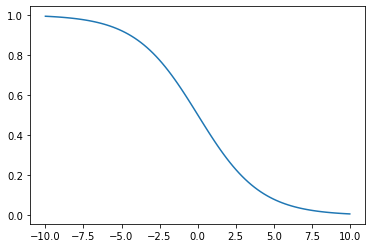

In [57]:
x_gen = np.linspace(-10,10,100)
x_gen = sm.add_constant(x_gen)
preds = log_reg.predict(x_gen)
plt.plot(x_gen[:,1],preds)

(0.0, 1.0)

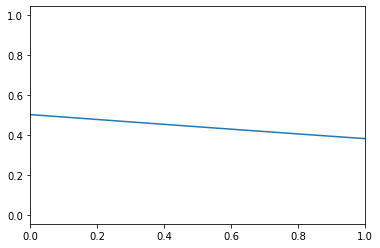

In [58]:
plt.plot(x_gen[:,1],preds)
plt.xlim(0,1)

In [59]:
b_0 = log_reg.params.values[0]
b_1 = log_reg.params.values[1]

In [60]:
x = 0
prob_transport = exp(b_0 + b_1*(x))/(1 + exp(b_0 + b_1*(x)))
prob_transport

0.502587800369686

In [61]:
x = 1
prob_transport = exp(b_0 + b_1*(x))/(1 + exp(b_0 + b_1*(x)))
prob_transport

0.3828125

## Multinomial Logistic Regression

In [62]:
titanic_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,1


In [66]:
titanic_train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [64]:
Xtrain = titanic_train[['Destination', 'Age', 'VIP']]
Xtrain = pd.get_dummies(data=Xtrain, drop_first=True)
ytrain = titanic_train[['HomePlanet']]

Xtrain = sm.add_constant(Xtrain)

In [65]:
Xtrain

,const,Age,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1.0,39.0,0,1,0
1,1.0,24.0,0,1,0
2,1.0,58.0,0,1,1
3,1.0,33.0,0,1,0
5,1.0,44.0,1,0,0
...,...,...,...,...,...
8686,1.0,32.0,0,1,0
8689,1.0,18.0,1,0,0
8690,1.0,26.0,0,1,0
8691,1.0,32.0,0,0,0


In [67]:
log_reg = sm.MNLogit(ytrain, Xtrain).fit()
log_reg.summary()

         Current function value: 0.887809
         Iterations: 35


/Users/sharad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             HomePlanet   No. Observations:                 5538
Model:                        MNLogit   Df Residuals:                     5528
Method:                           MLE   Df Model:                            8
Date:                Sun, 22 May 2022   Pseudo R-squ.:                  0.1175
Time:                        10:11:16   Log-Likelihood:                -4916.7
converged:                      False   LL-Null:                       -5571.1
Covariance Type:            nonrobust   LLR p-value:                2.960e-277
=============================================================================================
        HomePlanet=Europa       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.1516      0.098    -11.808      0.000      -1.343      -0.960
Age                           0.0438      0.003     17.221      0.000       0.039       0.049
Destination_PSO J318.5-22    -4.2516      0.311    -13.650      0.000      -4.862      -3.641
Destination_TRAPPIST-1e      -1.1389      0.079    -14.470      0.000      -1.293      -0.985
VIP_True                     25.0961   1.59e+04      0.002      0.999    -3.1e+04    3.11e+04
---------------------------------------------------------------------------------------------
          HomePlanet=Mars       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.7721      0.122    -14.516      0.000      -2.011      -1.533
Age                           0.0149      0.003      5.760      0.000       0.010       0.020
Destination_PSO J318.5-22    -1.6849      0.226     -7.447      0.000      -2.128      -1.241
Destination_TRAPPIST-1e       0.6107      0.108      5.658      0.000       0.399       0.822
VIP_True                     24.7241   1.59e+04      0.002      0.999    -3.1e+04    3.11e+04
=============================================================================================
"""